In [3]:
#JBM Product Image classifier.
#Implementation on tensorflow with Keras. backend is tensorflow
#Use pretrained model VGG16 for classification as we have little data for training .
#so use existing model and train own data set on pretrained model
#below are the step to download the weights of existing VGG16 pretrained model

from keras.applications import inception_v3
conv_base = inception_v3.InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [4]:
# summary of convolutional and pooling layers of existing pretrained model
conv_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 74, 74, 32)   96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 74, 74, 32)   0           batch_normalization_95[0][0]     
__________________________________________________________________________________________________
conv2d_96 

In [5]:
# loaded all required python libraries for image classification

from imutils import paths
import numpy as np
import argparse
import random
import pickle
import cv2
import os
from pprint import pprint
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,SGD
from keras.preprocessing.image import img_to_array,array_to_img
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from keras import optimizers
from keras.layers.core import Flatten
from keras.layers.core import Activation
import re
from keras import backend as K
from keras.models import load_model
from tensorflow.python.saved_model import builder as h5_to_pb
from tensorflow.python.saved_model.signature_def_utils import predict_signature_def
from tensorflow.python.saved_model import tag_constants



In [6]:
path  = os.getcwd()
dirPath = path + "\\train_61326\\"
#pprint(trainDir)
for dirName in os.listdir(dirPath):
    if not os.path.isdir(os.path.join(dirPath, dirName)):
        continue
    newdir = re.sub('[ _]+','',dirName)
    pprint(newdir)
    pprint(dirPath)
    os.rename(os.path.join(dirPath, dirName), os.path.join(dirPath, newdir))

'613260kback'
'C:\\Users\\epubhar\\Desktop\\puneet\\JBM\\train_61326\\'
'61326okfront'
'C:\\Users\\epubhar\\Desktop\\puneet\\JBM\\train_61326\\'
'61326ScratchMark'
'C:\\Users\\epubhar\\Desktop\\puneet\\JBM\\train_61326\\'
'61326SlotDamage'
'C:\\Users\\epubhar\\Desktop\\puneet\\JBM\\train_61326\\'
'61326Thinning'
'C:\\Users\\epubhar\\Desktop\\puneet\\JBM\\train_61326\\'
'61326Wrinkle'
'C:\\Users\\epubhar\\Desktop\\puneet\\JBM\\train_61326\\'


In [7]:
# this step involves to read all the filenames from training directory and remove the spaces in filenames

trainpath = path + "\\train_61326\\"
dirlist = ["613260kback","61326Wrinkle","61326Thinning","61326SlotDamage","61326ScratchMark","61326okfront"]
for dirname in dirlist:
    pathname=None
    pathname = trainpath + dirname
    print(pathname)
    filenames = os.listdir(pathname)
    for filename in filenames:
        os.rename(os.path.join(pathname, filename), os.path.join(pathname, filename.replace(' ', '')))

C:\Users\epubhar\Desktop\puneet\JBM\train_61326\613260kback
C:\Users\epubhar\Desktop\puneet\JBM\train_61326\61326Wrinkle
C:\Users\epubhar\Desktop\puneet\JBM\train_61326\61326Thinning
C:\Users\epubhar\Desktop\puneet\JBM\train_61326\61326SlotDamage
C:\Users\epubhar\Desktop\puneet\JBM\train_61326\61326ScratchMark
C:\Users\epubhar\Desktop\puneet\JBM\train_61326\61326okfront


In [8]:
#in this step reading all the images from path
# converting all images to array
#inserted all folder labels and dataset to list

data=[]
labels=[]
imagePaths = sorted(list(paths.list_images(dirPath)))
IMAGE_DIMS = (150, 150, 3)
#pprint(imagePaths)
for imagePath in imagePaths:
    
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
    image = img_to_array(image)
    data.append(image)

    l = label = imagePath.split(os.path.sep)[-2].split("_")
    labels.append(l)

pprint(labels)
    

[['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['613260kback'],
 ['61326ScratchMark'],
 ['61326ScratchMark'],
 ['61326ScratchMark'],
 ['61326ScratchMark'],
 ['61326ScratchMark'],
 ['61326ScratchMark'],
 ['61326ScratchMark'],
 ['61326ScratchMark'],
 ['61326ScratchMark'],
 ['61326ScratchMark'],
 ['61326ScratchMark'],
 ['61326ScratchMark'],
 ['61326ScratchMark'],

In [9]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)



In [10]:
#multilabelbinarizer is used for multiple classification at once
#splitting the dataset into training and validation sets
#print the labels to find how many number of classes for classification
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(labels)
(trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.2, random_state=42)
#pprint(mlb.classes_)

In [11]:
#created sequential model
#added dense layers with relu and sigmoid activation function
#use dropout to check the threshold value of every neuron. and those neuron will be consider which are the pobability is > 0.5
#use softmax layers to find the probability of every class
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
predictions = layers.Dense(len(mlb.classes_), activation='softmax')(x)
model = models.Model(inputs=conv_base.input, outputs=predictions)


In [12]:
# in vgg-16 existing model freeze initial layers . all own dataset will be trained on last layers.
#freeze initial layers because inital layers get same kind of features for every data set and 
#all changes reflected into last layers
#used RMSprop gradient descent optimzer for fast learning

for layer in conv_base.layers[:249]:
    layer.trainable = False
for layer in conv_base.layers[249:]:
    layer.trainable = True


model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(trainX, trainY,
                    epochs=10,
                    batch_size=20,
                    validation_data=(testX, testY))

Train on 173 samples, validate on 44 samples
Epoch 1/10
173/173 [==============================] - 37s 213ms/step - loss: 0.3833 - acc: 0.8516 - val_loss: 0.4905 - val_acc: 0.8258
Epoch 2/10
173/173 [==============================] - 38s 218ms/step - loss: 0.2651 - acc: 0.8921 - val_loss: 0.4780 - val_acc: 0.8144
Epoch 3/10
173/173 [==============================] - 36s 209ms/step - loss: 0.2004 - acc: 0.9200 - val_loss: 0.4707 - val_acc: 0.8182
Epoch 4/10
173/173 [==============================] - 37s 216ms/step - loss: 0.1710 - acc: 0.9355 - val_loss: 0.4993 - val_acc: 0.8485
Epoch 5/10
173/173 [==============================] - 40s 232ms/step - loss: 0.1261 - acc: 0.9586 - val_loss: 0.4927 - val_acc: 0.8485
Epoch 6/10
173/173 [==============================] - 38s 218ms/step - loss: 0.1055 - acc: 0.9711 - val_loss: 0.5000 - val_acc: 0.8523
Epoch 7/10
173/173 [==============================] - 40s 233ms/step - loss: 0.0937 - acc: 0.9740 - val_loss: 0.4965 - val_acc: 0.8523
Epoch 8/10

In [13]:
#in above steps model has been trained now saving the model
model.save('ImageClassifier-inception.h5')

In [14]:
#remove the spaces from test dataset filenames

testPath = path + "\\test_61326\\"
testdirlist = ["613260kback","61326Wrinkle","61326Thinning","61326SlotDamage","61326ScratchMark","61326okfront"]
for dirname in testdirlist:
    pathname=None
    pathname = testPath + dirname
    print(pathname)
    filenames = os.listdir(pathname)
    for filename in filenames:
        os.rename(os.path.join(pathname, filename), os.path.join(pathname, filename.replace(' ', '')))

C:\Users\epubhar\Desktop\puneet\JBM\test_61326\613260kback
C:\Users\epubhar\Desktop\puneet\JBM\test_61326\61326Wrinkle
C:\Users\epubhar\Desktop\puneet\JBM\test_61326\61326Thinning
C:\Users\epubhar\Desktop\puneet\JBM\test_61326\61326SlotDamage
C:\Users\epubhar\Desktop\puneet\JBM\test_61326\61326ScratchMark
C:\Users\epubhar\Desktop\puneet\JBM\test_61326\61326okfront


In [15]:
#converted testing images to array as we have done the same step for training images

testdata=[]
testlabels=[]


imagePaths = sorted(list(paths.list_images(testPath)))
IMAGE_DIMS1 = (150, 150, 3)
#pprint(imagePaths)
for imagePath in imagePaths:
    
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (IMAGE_DIMS1[1], IMAGE_DIMS1[0]))
    image = img_to_array(image)
    testdata.append(image)
    testd = testdata
    
    l = label = imagePath.split(os.path.sep)[-2].split("_")
    testlabels.append(l)
    testl = testlabels
pprint(testl)

testdata = np.array(testdata, dtype="float") / 255.0
testlabels = np.array(testlabels)
testlabels=mlb.fit_transform(testlabels)

[['613260kback'],
 ['61326ScratchMark'],
 ['61326SlotDamage'],
 ['61326Thinning'],
 ['61326Wrinkle'],
 ['61326okfront']]


In [16]:
#This step predicting the results on new dataset
classes = model.predict(testdata)
pprint(classes)

array([[3.26836020e-01, 4.35936563e-02, 1.45002045e-02, 1.56966880e-01,
        2.03679991e-03, 4.56066459e-01],
       [2.53034830e-02, 2.38259777e-01, 5.99541031e-02, 3.62240642e-01,
        3.21773405e-04, 3.13920230e-01],
       [3.85161042e-02, 4.87381741e-02, 1.51048694e-02, 5.36183938e-02,
        1.28934649e-03, 8.42733145e-01],
       [1.48917071e-03, 4.37996611e-02, 5.19931503e-03, 2.12079957e-02,
        2.12527098e-04, 9.28091288e-01],
       [3.74007151e-02, 2.65458941e-01, 1.12715945e-01, 1.57351807e-01,
        5.99407183e-04, 4.26473230e-01],
       [5.38941771e-02, 7.09681287e-02, 8.07289872e-03, 9.66393277e-02,
        5.91705786e-04, 7.69833803e-01]], dtype=float32)


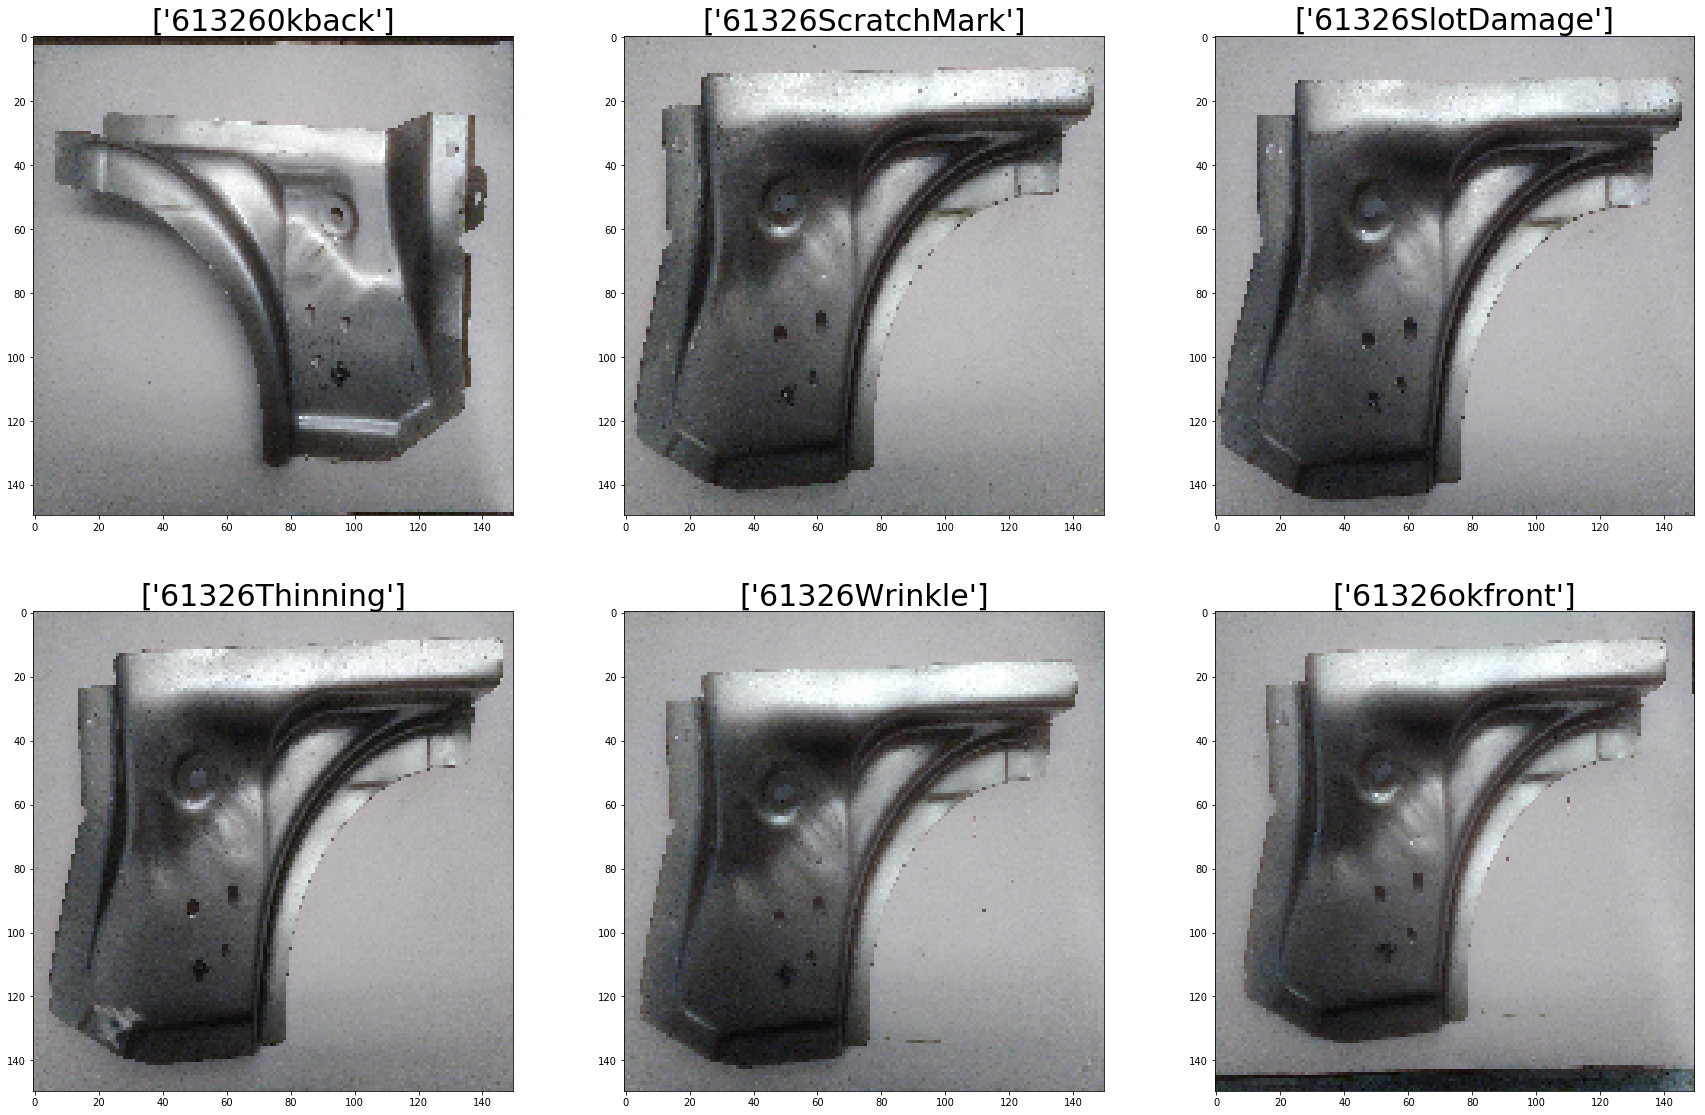

In [17]:
#converting test array dataset to image
#plot the predicted images and corresponding labels
for i in range(len(classes)):
    image1 = array_to_img(testdata[i])
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 30
    fig_size[1] = 30
    plt.rcParams["figure.figsize"] = fig_size
    plt.subplot(3, 3, i+4)
    plt.imshow(image1)
    plt.axis('on')
    plt.title(testl[i],fontsize=30)

In [19]:
#converted Keras Model to tensorflow pb graph file

K.set_learning_phase(0)
keras_model = load_model(path + "\\ImageClassifier-inception.h5")
pbSaveFile = h5_to_pb.SavedModelBuilder(path + "\\ImageClassifier-inception.pb")
nodesSignature = predict_signature_def(inputs={"images": keras_model.input},outputs={"scores": keras_model.output})

with K.get_session() as sess:
    pbSaveFile.add_meta_graph_and_variables(sess=sess, tags=[tag_constants.SERVING],
                                          signature_def_map={"predict": nodesSignature})
pbSaveFile.save()


INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: b'C:\\Users\\epubhar\\Desktop\\puneet\\JBM\\ImageClassifier-inception.pb\\saved_model.pb'


b'C:\\Users\\epubhar\\Desktop\\puneet\\JBM\\ImageClassifier-inception.pb\\saved_model.pb'